IMPORTING ALL NECESSARY PACKAGES. MOST OF THEM ARE ALREADY IN THE ANACONDA DISTRIBUTION

In [1]:
import requests
from bs4 import BeautifulSoup as soup
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [2]:
url ='https://understat.com/match/19368'

In [3]:
html = requests.get(url)

In [4]:
html.content

b'<!DOCTYPE html>\n<html>\n    <head>\n\t\t<base href="https://understat.com/">\n\t\t<title>Bochum 0 - 7 Bayern Munich (August 21 2022) | Bundesliga | 2022/2023 | xG | Understat.com</title>\n        <meta charset="UTF-8" />\n\t\t<meta name="description" content="Bochum 0 - 7 Bayern Munich. Check out detailed player statistic, goals, assists, key passes, xG, shot map, xGplot.">\n\t\t<meta name="Keywords" content="Bochum, Bayern Munich, Bundesliga, 2022/2023, (August 21 2022), xG, expected goals, shot map"> \n\t\t\t<link rel="apple-touch-icon" sizes="180x180" href="apple-touch-icon.png">\n\t<link rel="icon" type="image/png" sizes="32x32" href="favicon-32x32.png">\n\t<link rel="icon" type="image/png" sizes="16x16" href="favicon-16x16.png">\n\t<link rel="manifest" href="manifest.json">\n\t<link rel="mask-icon" href="safari-pinned-tab.svg" color="#5bbad5">\n\t<meta name="apple-mobile-web-app-title" content="understat">\n\t<meta name="application-name" content="understat">\n\t<meta name="the

In [5]:
parse_soup = soup(html.content,'lxml')

In [6]:
scripts = parse_soup.find_all('script')
len(scripts)

23

A QUICK GLANCE AND WE FIND THE NECESSARY DATA(SHOTSDATA) IS INDEX 3. SO WE EXTRACT FROM THAT DICTIONARY.

In [7]:
scripts[1].string

"\n\tvar shotsData \t= JSON.parse('\\x7B\\x22h\\x22\\x3A\\x5B\\x7B\\x22id\\x22\\x3A\\x22482503\\x22,\\x22minute\\x22\\x3A\\x226\\x22,\\x22result\\x22\\x3A\\x22BlockedShot\\x22,\\x22X\\x22\\x3A\\x220.895\\x22,\\x22Y\\x22\\x3A\\x220.5770000076293945\\x22,\\x22xG\\x22\\x3A\\x220.08067154884338379\\x22,\\x22player\\x22\\x3A\\x22Simon\\x20Zoller\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x22139\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222022\\x22,\\x22shotType\\x22\\x3A\\x22RightFoot\\x22,\\x22match_id\\x22\\x3A\\x2219368\\x22,\\x22h_team\\x22\\x3A\\x22Bochum\\x22,\\x22a_team\\x22\\x3A\\x22Bayern\\x20Munich\\x22,\\x22h_goals\\x22\\x3A\\x220\\x22,\\x22a_goals\\x22\\x3A\\x227\\x22,\\x22date\\x22\\x3A\\x222022\\x2D08\\x2D21\\x2015\\x3A30\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Kevin\\x20St\\x5Cu00f6ger\\x22,\\x22lastAction\\x22\\x3A\\x22Chipped\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22482510\\x22,\\x22minute\\x22\\x3A\\x2222\\x22,\\x22result\

In [8]:
strings = scripts[1].string

In [9]:
ind_start = strings.index("('")+2
ind_end = strings.index("')")

json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')

json_data

'{"h":[{"id":"482503","minute":"6","result":"BlockedShot","X":"0.895","Y":"0.5770000076293945","xG":"0.08067154884338379","player":"Simon Zoller","h_a":"h","player_id":"139","situation":"OpenPlay","season":"2022","shotType":"RightFoot","match_id":"19368","h_team":"Bochum","a_team":"Bayern Munich","h_goals":"0","a_goals":"7","date":"2022-08-21 15:30:00","player_assisted":"Kevin St\\u00f6ger","lastAction":"Chipped"},{"id":"482510","minute":"22","result":"MissedShots","X":"0.895","Y":"0.40299999237060546","xG":"0.31154710054397583","player":"Anthony Losilla","h_a":"h","player_id":"9705","situation":"OpenPlay","season":"2022","shotType":"RightFoot","match_id":"19368","h_team":"Bochum","a_team":"Bayern Munich","h_goals":"0","a_goals":"7","date":"2022-08-21 15:30:00","player_assisted":"Philipp Hofmann","lastAction":"HeadPass"},{"id":"482513","minute":"30","result":"SavedShot","X":"0.9130000305175782","Y":"0.5079999923706054","xG":"0.06409253180027008","player":"Philipp Hofmann","h_a":"h","pl

In [10]:
data = json.loads(json_data)
#data

In [11]:
data['a']

[{'id': '482502',
  'minute': '3',
  'result': 'Goal',
  'X': '0.8490000152587891',
  'Y': '0.34799999237060547',
  'xG': '0.0503031462430954',
  'player': 'Leroy Sané',
  'h_a': 'a',
  'player_id': '337',
  'situation': 'OpenPlay',
  'season': '2022',
  'shotType': 'RightFoot',
  'match_id': '19368',
  'h_team': 'Bochum',
  'a_team': 'Bayern Munich',
  'h_goals': '0',
  'a_goals': '7',
  'date': '2022-08-21 15:30:00',
  'player_assisted': 'Kingsley Coman',
  'lastAction': 'Pass'},
 {'id': '482504',
  'minute': '9',
  'result': 'SavedShot',
  'X': '0.735',
  'Y': '0.525',
  'xG': '0.02417665347456932',
  'player': 'Leroy Sané',
  'h_a': 'a',
  'player_id': '337',
  'situation': 'OpenPlay',
  'season': '2022',
  'shotType': 'LeftFoot',
  'match_id': '19368',
  'h_team': 'Bochum',
  'a_team': 'Bayern Munich',
  'h_goals': '0',
  'a_goals': '7',
  'date': '2022-08-21 15:30:00',
  'player_assisted': 'Kingsley Coman',
  'lastAction': 'Pass'},
 {'id': '482505',
  'minute': '10',
  'result': 

In [12]:
hteam=data['a'][0]['h_team'].upper()
hteam

'BOCHUM'

In [13]:
ateam=data['a'][0]['a_team'].upper()
ateam

'BAYERN MUNICH'

In [14]:
x = []
y = []
xg = []
result = []
player = []
homeaway = []

for i,_ in enumerate(data['h']):
    for key in data['h'][i]:
        if key=='X':
            x.append(data['h'][i][key])
        if key=='Y':
            y.append(data['h'][i][key])
        if key=='xG':
            xg.append(data['h'][i][key])
        if key=='result':
            result.append(data['h'][i][key])
        if key=='player':
            player.append(data['h'][i][key])
        if key=='h_a':
            homeaway.append(data['h'][i][key])
            
for i,_ in enumerate(data['a']):
    for key in data['a'][i]:
        if key=='X':
            x.append(data['a'][i][key])
        if key=='Y':
            y.append(data['a'][i][key])
        if key=='xG':
            xg.append(data['a'][i][key])
        if key=='result':
            result.append(data['a'][i][key])
        if key=='player':
            player.append(data['a'][i][key])
        if key=='h_a':
            homeaway.append(data['a'][i][key])


In [15]:
data['a'][3]['result']

'BlockedShot'

In [16]:
columns = ['X','Y','xG','Result','Player', 'HomeAway']
df_understat = pd.DataFrame([x, y, xg, result, player, homeaway], index=columns)
df_understat

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
X,0.895,0.895,0.9130000305175782,0.7330000305175781,0.7809999847412109,0.8490000152587891,0.885,0.18799999237060547,0.8630000305175781,0.8090000152587891,...,0.8959999847412109,0.894000015258789,0.7730000305175782,0.9330000305175781,0.885,0.8219999694824218,0.779000015258789,0.8830000305175781,0.6909999847412109,0.8440000152587891
Y,0.5770000076293945,0.40299999237060546,0.5079999923706054,0.4879999923706055,0.405,0.18200000762939453,0.41200000762939454,0.40099998474121096,0.6769999694824219,0.325,...,0.35700000762939454,0.5120000076293946,0.3370000076293945,0.5790000152587891,0.5,0.38799999237060545,0.2570000076293945,0.28399999618530275,0.6359999847412109,0.38599998474121094
xG,0.08067154884338379,0.31154710054397583,0.06409253180027008,0.013979781419038773,0.025174451991915703,0.009801622480154037,0.028262851759791374,0,0.03997621312737465,0.024053066968917847,...,0.4102396070957184,0.1437358856201172,0.025666369125247,0.5489744544029236,0.75777667760849,0.07055540382862091,0.049706753343343735,0.06471016258001328,0.020603500306606293,0.09448578953742981
Result,BlockedShot,MissedShots,SavedShot,SavedShot,SavedShot,MissedShots,SavedShot,OwnGoal,SavedShot,MissedShots,...,Goal,MissedShots,MissedShots,SavedShot,Goal,SavedShot,MissedShots,Goal,SavedShot,BlockedShot
Player,Simon Zoller,Anthony Losilla,Philipp Hofmann,Philipp Förster,Takuma Asano,Cristian Gamboa,Anthony Losilla,Cristian Gamboa,Gerrit Holtmann,Kevin Stöger,...,Sadio Mané,Joshua Kimmich,Kingsley Coman,Leroy Sané,Sadio Mané,Joshua Kimmich,Leroy Sané,Serge Gnabry,Serge Gnabry,Ryan Gravenberch
HomeAway,h,h,h,h,h,h,h,h,h,h,...,a,a,a,a,a,a,a,a,a,a


In [17]:
df_understat = df_understat.T
df_understat = df_understat.apply(pd.to_numeric,errors='ignore')
df_understat

,X,Y,xG,Result,Player,HomeAway
0,0.895,0.577,0.080672,BlockedShot,Simon Zoller,h
1,0.895,0.403,0.311547,MissedShots,Anthony Losilla,h
2,0.913,0.508,0.064093,SavedShot,Philipp Hofmann,h
3,0.733,0.488,0.013980,SavedShot,Philipp Förster,h
4,0.781,0.405,0.025174,SavedShot,Takuma Asano,h
5,0.849,0.182,0.009802,MissedShots,Cristian Gamboa,h
6,0.885,0.412,0.028263,SavedShot,Anthony Losilla,h
7,0.188,0.401,0.000000,OwnGoal,Cristian Gamboa,h
8,0.863,0.677,0.039976,SavedShot,Gerrit Holtmann,h
9,0.809,0.325,0.024053,MissedShots,Kevin Stöger,h


In [18]:
df_understat[df_understat['Result']=='OwnGoal']

,X,Y,xG,Result,Player,HomeAway
7,0.188,0.401,0.0,OwnGoal,Cristian Gamboa,h


In [19]:
# THE X AND Y LABELS ARE SCALED BETWEEN 0 and 1. SINCE WE WILL BE USING OPTA AXES WHICH GO FROM 100 to 100, WE NEED TO
# SCALE BOTH THESE UPTO 100

df_understat['X'] = df_understat['X'].apply(lambda x:x*100)
df_understat['Y'] = df_understat['Y'].apply(lambda x:x*100)

df_understat['Result'].unique()

array(['BlockedShot', 'MissedShots', 'SavedShot', 'OwnGoal', 'Goal',
       'ShotOnPost'], dtype=object)

In [20]:
df_h=df_understat[df_understat['HomeAway']=='h']
df_h.head()

,X,Y,xG,Result,Player,HomeAway
0,89.500000,57.700001,0.080672,BlockedShot,Simon Zoller,h
1,89.500000,40.299999,0.311547,MissedShots,Anthony Losilla,h
2,91.300003,50.799999,0.064093,SavedShot,Philipp Hofmann,h
3,73.300003,48.799999,0.013980,SavedShot,Philipp Förster,h
4,78.099998,40.500000,0.025174,SavedShot,Takuma Asano,h


In [21]:
df_a=df_understat[df_understat['HomeAway']=='a']
df_a.head()

,X,Y,xG,Result,Player,HomeAway
14,84.900002,34.799999,0.050303,Goal,Leroy Sané,a
15,73.500000,52.500000,0.024177,SavedShot,Leroy Sané,a
16,88.199997,41.200001,0.096472,MissedShots,Benjamin Pavard,a
17,77.500000,41.400002,0.051453,BlockedShot,Thomas Müller,a
18,73.000000,23.200001,0.018626,BlockedShot,Benjamin Pavard,a


In [22]:
df_h.head()

,X,Y,xG,Result,Player,HomeAway
0,89.500000,57.700001,0.080672,BlockedShot,Simon Zoller,h
1,89.500000,40.299999,0.311547,MissedShots,Anthony Losilla,h
2,91.300003,50.799999,0.064093,SavedShot,Philipp Hofmann,h
3,73.300003,48.799999,0.013980,SavedShot,Philipp Förster,h
4,78.099998,40.500000,0.025174,SavedShot,Takuma Asano,h


In [23]:
#def ownGoalsH():
rowH=pd.DataFrame(df_h[df_h['Result']=='OwnGoal'])
rowA=pd.DataFrame(df_a[df_a['Result']=='OwnGoal'])

if len(rowH) > 0:
    rowH['X']=100-rowH['X']
    rowH['Y']=100-rowH['Y']
    rowH['xG']=0.05
    df_h=df_h[df_h['Result']!='OwnGoal']
    rowH['Result']='Goal'
    
    
if len(rowA)> 0:
    rowA['X']=100-rowA['X']
    rowA['Y']=100-rowA['Y']
    rowA['xG']=0.05
    df_a=df_a[df_a['Result']!='OwnGoal']
    rowA['Result']= 'Goal'



#print(rowIn)
df_a=pd.concat([df_a, rowH]).copy()
df_h=pd.concat([df_h, rowA]).copy()
    #df_p=df_a[df_a['Result']!= 'OwnGoal']
    #df_p.head()
#df_a['Result'].unique()

In [24]:
#rowH['Result']='Goal'
df_a.tail()

,X,Y,xG,Result,Player,HomeAway
32,77.900002,25.700001,0.049707,MissedShots,Leroy Sané,a
33,88.300003,28.400000,0.064710,Goal,Serge Gnabry,a
34,69.099998,63.599998,0.020604,SavedShot,Serge Gnabry,a
35,84.400002,38.599998,0.094486,BlockedShot,Ryan Gravenberch,a
7,81.200001,59.900002,0.050000,Goal,Cristian Gamboa,h


In [25]:
df_a['Player'][15]

'Leroy Sané'

In [26]:
#df_h=df_h[df_h['Result']!= 'OwnGoal']
df_h['Result'].unique()

array(['BlockedShot', 'MissedShots', 'SavedShot'], dtype=object)

In [27]:
#df_h=df_h[df_h['Result']!= 'OwnGoal']
df_a['Result'].unique()

array(['Goal', 'SavedShot', 'MissedShots', 'BlockedShot', 'ShotOnPost'],
      dtype=object)

In [28]:
#ownGoalsH()
#df_a[df_a['Result']!= 'OwnGoal']
#df_h['Result'].unique()

In [29]:
#rowIn=df_h[df_h['Result']=='OwnGoal']
#rowIn

In [30]:
#pruebadf=pd.concat([df_a, rowIn])
#pruebadf['Result'].unique()

In [31]:
#df_h.drop(df_h[df_h['Result']=='OwnGoal'], axis=0)

In [32]:
#df_h=ownGoals(df_a, df_h)

In [33]:
df_a[df_a['Result']=='Goal']

,X,Y,xG,Result,Player,HomeAway
14,84.900002,34.799999,0.050303,Goal,Leroy Sané,a
21,96.099998,42.400002,0.304761,Goal,Matthijs de Ligt,a
24,90.599998,43.400002,0.467935,Goal,Kingsley Coman,a
26,89.599998,35.700001,0.410240,Goal,Sadio Mané,a
30,88.500000,50.000000,0.757777,Goal,Sadio Mané,a
33,88.300003,28.400000,0.064710,Goal,Serge Gnabry,a
7,81.200001,59.900002,0.050000,Goal,Cristian Gamboa,h


In [34]:
len(df_a['Result'])

23

 NOW WE NEED TO DOWNLOAD TWO PACKAGES MPLSOCCER AND HIGHLIGHT-TEXT

The documentation for mplsoccer is at https://mplsoccer.readthedocs.io/en/latest/gallery/index.html while that for highlight-text is at https://pypi.org/project/highlight-text/#:~:text=the%20examples%20below.-,Use,the%20figure%20in%20figure%20coordinates.

In [35]:
#pip install mplsoccer
#pip install highlight-text

In [36]:
from highlight_text import ax_text,fig_text
import mplsoccer

WE WILL CHANGE SOME OF THE BASIC PARAMETERS USING THE rcParams method OF MPL

In [37]:
background = '#D6DBD9'
text_color = 'black'
mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['text.color']=text_color
mpl.rcParams['font.family']='Calibri'
mpl.rcParams['legend.fontsize'] = 12


In [38]:
import  numpy as np

In [39]:
df_h['OGColor']=np.where(df_h['HomeAway']=='a', 'orange', 'red')
df_h.tail()

,X,Y,xG,Result,Player,HomeAway,OGColor
9,80.900002,32.500000,0.024053,MissedShots,Kevin Stöger,h,red
10,91.099998,35.400002,0.008287,MissedShots,Ivan Ordets,h,red
11,90.800003,60.900002,0.067902,SavedShot,Simon Zoller,h,red
12,88.000000,65.500000,0.059917,SavedShot,Gerrit Holtmann,h,red
13,87.400002,54.200001,0.013959,MissedShots,Erhan Masovic,h,red


In [40]:
df_a['OGColor']=np.where(df_a['HomeAway']=='h', 'orange', 'red')
df_a.tail()

,X,Y,xG,Result,Player,HomeAway,OGColor
32,77.900002,25.700001,0.049707,MissedShots,Leroy Sané,a,red
33,88.300003,28.400000,0.064710,Goal,Serge Gnabry,a,red
34,69.099998,63.599998,0.020604,SavedShot,Serge Gnabry,a,red
35,84.400002,38.599998,0.094486,BlockedShot,Ryan Gravenberch,a,red
7,81.200001,59.900002,0.050000,Goal,Cristian Gamboa,h,orange


FINALLY WE USE THE OOPS API OF PYTHON TO PLOT OUR VIZ

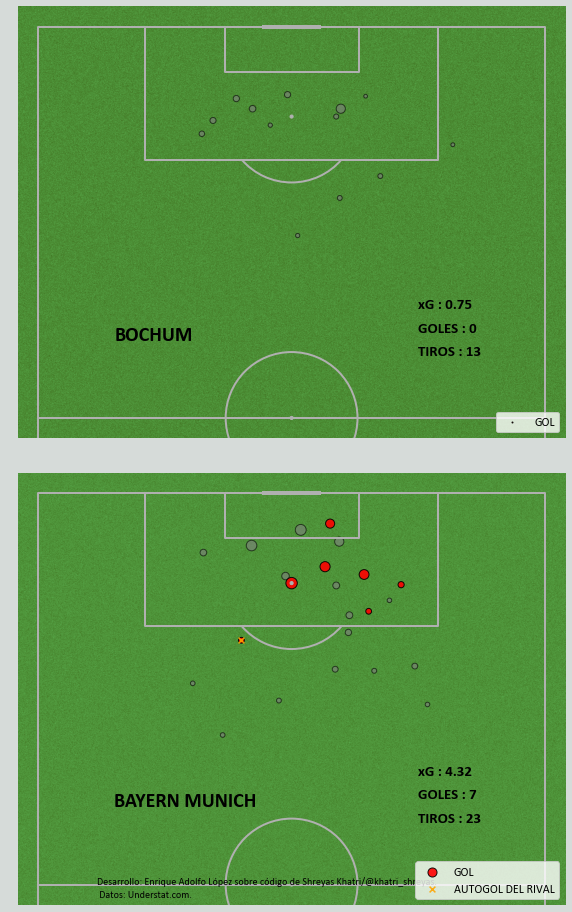

In [44]:
# SETTING UP THE AXES
fig, ax = plt.subplots(figsize=(10,12))
ax.axis('off')
fig.set_facecolor(background)

#SETTING UP THE MPL AXIS FOR THE FIRST SEASON
pitch = mplsoccer.VerticalPitch(half=True,pitch_type='opta',line_zorder=3,pitch_color='grass')
ax_opta1 = fig.add_axes([0.02, 0.55, 1, 0.5])
ax_opta1.patch.set_facecolor(background)
pitch.draw(ax=ax_opta1)

#PLOTTING HTEAM
#df_fil = df_understat.loc[df_understat['HomeAway']=='h']
df_fil = df_h
df_hOG = df_fil[df_fil['HomeAway']=='a']

pitch.scatter(df_fil[df_fil['Result']!='Goal']['X'],df_fil[df_fil['Result']!='Goal']['Y'], 
              s=np.sqrt(df_fil[df_fil['Result']!='Goal']['xG'])*150, marker='o', alpha=0.6,
              edgecolor='black', facecolor='grey', ax=ax_opta1)

#NOW PLOTTING THE GOALS
pitch.scatter(df_fil[df_fil['Result']=='Goal']['X'],df_fil[df_fil['Result']=='Goal']['Y'], 
              s=np.sqrt(df_fil[df_fil['Result']=='Goal']['xG'])*150, marker='o', alpha=0.9,
              edgecolor='black', facecolor='red', ax=ax_opta1, label='GOL')
#OwnGoals
if len(df_hOG) >0:
    pitch.scatter(df_hOG[df_hOG['Result']=='Goal']['X'],df_hOG[df_hOG['Result']=='Goal']['Y'], 
              s=np.sqrt(df_hOG[df_hOG['Result']=='Goal']['xG'])*150, marker='x', alpha=0.9,
              edgecolor='black', facecolor='orange', ax=ax_opta1, label='AUTOGOL DEL RIVAL')


# ADDING THE LEGEND
ax_opta1.legend(loc='lower right').get_texts()[0].set_color("black")

ax_opta1.text(25,61,'GOLES : '+str(len(df_fil[df_fil['Result']=='Goal'])), weight='bold', size=15)
ax_opta1.text(25,64,f"xG : {round(sum(df_fil['xG']),2)}", weight='bold', size=15)
ax_opta1.text(25,58,'TIROS : '+str(len(df_fil)), weight='bold', size=15)
ax_opta1.text(85, 60, hteam, weight='bold', size=20)

# DOING THE SAME FOR THE 20-21 SEASON TOO
ax_opta2 = fig.add_axes([0.02, 0.01, 1, 0.5]) #l,b,w,h
ax_opta2.patch.set_facecolor(background)
pitch.draw(ax=ax_opta2)

#PLOTTING ATEAM
#df_fil = df_understat.loc[df_understat['HomeAway']=='a']
df_fil = df_a
df_hOG = df_fil[df_fil['HomeAway']=='h']


pitch.scatter(df_fil[df_fil['Result']!='Goal']['X'],df_fil[df_fil['Result']!='Goal']['Y'], 
              s=np.sqrt(df_fil[df_fil['Result']!='Goal']['xG'])*150, marker='o', alpha=0.6,
              edgecolor='black', facecolor='grey', ax=ax_opta2)

#NOW PLOTTING THE GOALS
pitch.scatter(df_fil[df_fil['Result']=='Goal']['X'],df_fil[df_fil['Result']=='Goal']['Y'], 
              s=np.sqrt(df_fil[df_fil['Result']=='Goal']['xG'])*150, marker='o', alpha=0.9,
              edgecolor='black', facecolor='red', ax=ax_opta2, label='GOL')

#OwnGoals
if len(df_hOG) >0:

    pitch.scatter(df_hOG[df_hOG['Result']=='Goal']['X'],df_hOG[df_hOG['Result']=='Goal']['Y'], 
              s=np.sqrt(df_hOG[df_hOG['Result']=='Goal']['xG'])*150, marker='x', alpha=0.9,
              edgecolor='black', facecolor='orange', ax=ax_opta2, label='AUTOGOL DEL RIVAL')

# ADDING THE LEGEND
ax_opta2.legend(loc='lower right').get_texts()[0].set_color("black")

ax_opta2.text(25,61,'GOLES : '+str(len(df_fil[df_fil['Result']=='Goal'])), weight='bold', size=15)
ax_opta2.text(25,64,f"xG : {round(sum(df_fil['xG']),2)}", weight='bold', size=15)
ax_opta2.text(25,58,'TIROS : '+str(len(df_fil)), weight='bold', size=15)
ax_opta2.text(85, 60, ateam, weight='bold', size=20)

# NOW PLOTTING THE SCATTERPLOT
#ax_scatter = fig.add_axes([0.52,0.57,0.4,0.35])
#ax_scatter.patch.set_facecolor(background)

# SETTING UP THE X AND Y OF THE SCATTERPLOT
#no_90s = 10
#df_fil = df_fbref[df_fbref['90s']>=no_90s]
#df_fil = df_fil[df_fil['Pos'].apply(lambda x: x in ['FW','MF,FW','FW,MF'])]

#x,y = (df_fil['xG']/df_fil['90s']).to_list(), (df_fil['Gls']/df_fil['90s']).to_list()

#ax_scatter.scatter(x,y,alpha=0.3,c='#EF8804')

# NOW FILTERING ERLING HAALAND'S DATA
#df_player = df_fil[df_fil['Player']=='Erling Haaland']
#ax_scatter.scatter(df_player['xG']/df_player['90s'], df_player['Gls']/df_player['90s'], c='blue')

# ADDING FINISHING TOUCHES TO THE SCATTERPLOT
#ax_scatter.grid(b = True, color ='grey',
#            linestyle ='-.', linewidth = 0.5,
#            alpha = 0.4)
#ax_scatter.set_xlabel('Expected Goals per 90', fontdict = {'fontsize':15, 'weight' : 'bold', 'color':text_color})
#ax_scatter.set_ylabel('Goals per 90', fontdict = dict(fontsize = 15, weight = 'bold',color=text_color))


#ADDING HAALAND'S IMAGE
#ax_player = fig.add_axes([0,0.43,0.25,0.45])
#ax_player.axis('off')
#im = plt.imread('haaland.png')
#ax_player.imshow(im)

# ADDING TITLES AND INFO
#fig_text(0.1,0.94,"<ERLING HAALAND> Y SU PÓLVORA",weight='heavy', size=25, highlight_textprops=[{'color':'blue'}])
#fig_text(0.25,0.85,'POSICIÓN: <DELANTERO>',weight='bold', size=20, highlight_textprops=[{'color':'#EF8804'}])
#fig_text(0.25,0.81,'EDAD: <21>',weight='bold', size=20, highlight_textprops=[{'color':'red'}])

# ADDING CLUB LOGO
#ax_team = fig.add_axes([0.27,0.55,0.15,0.15])
#ax_team.axis('off')
#im = plt.imread('bvb.png')
#ax_team.imshow(im)

# ADDING A FOOTER
fig_text(0.25,0.043,'Desarrollo: Enrique Adolfo López sobre código\n de Shreyas Khatri/@khatri_shreyas. Datos: Understat.com.')# Comparison with <forwards>'+
 #       ' with more than '+str(no_90s)+' 90s('+str(no_90s*90)+' minutes).',
  #      size=12, highlight_textprops=[{'color':'#EF8804'}], weight = 'bold')

plt.savefig(f'{hteam}{ateam}_viz.png',dpi=300,facecolor=background)

CONGRATULATIONS, YOU HAVE SUCCESSFULLY MADE YOURSELF THIS AMAZING VIZUALISATION